# Seasonal Investing Strategy
by Stefan Erben, DIFA 2022/23

## Introduction
In this project, we will be exploring the concept of seasonal investing and testing its potential success in the stock market. Seasonal investing refers to the strategy of buying and selling stocks based on the time of year, in the belief that certain stocks tend to perform better during certain seasons.

## Seasonal Investing
Seasonal investing is a strategy that involves buying and selling stocks based on the time of year, in the belief that certain stocks tend to perform better during certain seasons. For example, some investors believe that stocks in the retail and tourism industries tend to do better in the summer months, while stocks in the energy sector tend to do better in the winter.

There are several potential benefits to using a seasonal investing strategy. For one, it allows investors to take advantage of predictable patterns in the stock market. Additionally, it can help investors to diversify their portfolio and reduce risk by not relying on a single industry or sector.

However, it's important to note that there are also potential drawbacks to seasonal investing. The stock market is unpredictable and there are no guarantees of success, so it's possible that a seasonal investing strategy could underperform compared to a more diversified approach. It's also important to carefully research and analyze any potential investments, as some companies may not be well-suited for a seasonal investing strategy. Overall, it's important to carefully consider the potential risks and rewards of any investing strategy before implementing it.

## Goal
The goal of this project is to determine whether seasonal investing is a viable strategy for maximizing returns in the stock market. To do this, I developed a strategy for testing the success of seasonal investing and applying it to a dataset of historical stock prices. In this case, the demo portfolio invests in the general market (represented via the Dow Jones) during the year and invests in individual consumer-market related stocks during the winter time. The idea behind this is to test whether it is possible to outperform the general market by using the seasonal investing approach.

## Limitations
There are several limitations to the work presented in this project that should be noted.

First, the use of fractional shares is not universally supported by brokers. While some brokers now allow investors to own fractional shares, the majority do not. This means that the results of this strategy may not be directly applicable to the majority of investors.

Second, this strategy does not take into account transaction costs. Every time a stock is bought or sold, there are typically fees involved. These fees can significantly impact the overall returns of an investing strategy, and so it's important to take them into account when evaluating the success of a strategy.

Third, this strategy does not consider dividends. Many stocks pay dividends to their shareholders, and these dividends can be a significant source of income for investors. By not taking dividends into account, this strategy may be underestimating the potential returns of certain investments.

Finally, this strategy does not take into account capital taxes or other fees that may be incurred when selling a position. In reality, these taxes and fees can significantly impact the profitability of an investment, and so it's important to consider them when evaluating the success of a strategy.

## Code structure
- Installing pip libraries
- Definition of functions, including their documentation
- Parameterization of the strategy
- Trading Strategy
- Visualization of the results

## Installing pip libraries

In [17]:
!pip install -r requirements.txt

## Definition of functions
Each of the following functions is documented to make their functionality comprehensible.

In [18]:
# import libraries
from turtle import pos
from unittest.result import failfast
import yahoo_fin.stock_info as ys
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import utils
import yfinance as yf
from dateutil import relativedelta
import numpy as np
import math
import pickle
import os


In [19]:
# definie initial variables
data = {"general": {"fiat": 0},
        "seasonal": {"fiat": 0}}
timeline = {"general": {"date": [], "value": []},
            "seasonal": {"date": [], "value": []}}


In [20]:
def download_data(all_symbols, starting_date):
    """
    Downloads all the data for all the symbols and saves it in a pickle file
    For each symbol, the data is saved in a seperate pickle file, e.g. "AAPL_20180101.pickle"
    
    Parameters:
        all_symbols (list): list of all the symbols
        starting_date (datetime.date): the date from which the data should be downloaded
    
    Returns:
        None
    """
    
    # check if folder exists, if not create it
    if not os.path.exists("data"):
        os.makedirs("data")
    
    
    # loop trough all files in data folder with the ending .pickle
    for file in os.listdir("data"):
        if file.endswith(".pickle"):
            # get the name of the symbol
            symbol = file.split("_")[0]

            # remove the symbol from the list if exists and the date is earlier then the available data
            if symbol in all_symbols:
                start_date = int(file.split("_")[1].replace(".pickle", ""))
            
                # check if the date is older then the available data
                if int(starting_date.strftime("%Y%m%d")) >= start_date:
                    all_symbols.remove(symbol)
                    # print("Data for " + symbol + " already exists, skipping it")
                else:
                    print("Incomplete data for " + symbol + " already exists, removing the file")
                    # remove the file
                    os.remove("data/" + file)
    
    # for each symbol download and save the data
    for symbol in all_symbols:
        # get the data
        data = yf.download(symbol, starting_date, datetime.date.today(), progress=False)
        data = data["Adj Close"]
        print("Downloaded data for " + symbol)

        data.to_pickle("data/" + symbol + "_" + str(starting_date.strftime("%Y%m%d")) + ".pickle")


In [21]:
def get_index(index):
    """
    Gets all the stock symbols represented by a given index, e.g. the S&P500
    
    Arguments:
        index (str): the index to get the symbols for
        
    Returns:
        list: list of all the symbols in that index
    """
    
    if index == "sp500":
        # symbols = ys.tickers_sp500()
        # weights = [6.830975, 5.280989, 3.071185, 1.872211, 1.726786, 1.634329, 1.582618, 1.550504, 1.414743, 1.399758, 1.14108, 1.043067, 1.030311, 1.000476, 0.98467, 0.934172, 0.877567, 0.850936, 0.84754, 0.802483, 0.789868, 0.783875, 0.770773, 0.723783, 0.697547, 0.68757, 0.627069, 0.610301, 0.609607, 0.595208, 0.575025, 0.574837, 0.550446, 0.54129, 0.53063, 0.507774, 0.503977, 0.497954, 0.496886, 0.474995, 0.466157, 0.463543, 0.456848, 0.447756, 0.446874, 0.440117, 0.4339, 0.423721, 0.413796, 0.412795, 0.402663, 0.401228, 0.398916, 0.386941, 0.382528, 0.381014, 0.380503, 0.38044, 0.371419, 0.369113, 0.359628, 0.357643, 0.356857, 0.355428, 0.350098, 0.348309, 0.342742, 0.340088, 0.337781, 0.33719, 0.318604, 0.31628, 0.305818, 0.305135, 0.304937, 0.301977, 0.295904, 0.289176, 0.275571, 0.275045, 0.27498, 0.270946, 0.270348, 0.264637, 0.263187, 0.262513, 0.259701, 0.258402, 0.255696, 0.246159, 0.243879, 0.243185, 0.242852, 0.242116, 0.241938, 0.240274, 0.235345, 0.230805, 0.228643, 0.227858, 0.227681, 0.22672, 0.220946, 0.218448, 0.216563, 0.214651, 0.211852, 0.206322, 0.206098, 0.198308, 0.19756, 0.193, 0.192842, 0.191263, 0.186138, 0.185968, 0.185276, 0.182644, 0.182633, 0.182163, 0.180074, 0.179709, 0.17786, 0.177151, 0.175331, 0.174386, 0.174323, 0.173406, 0.172765, 0.172125, 0.16746, 0.167421, 0.166777, 0.166592, 0.165045, 0.164155, 0.163585, 0.162115, 0.161347, 0.160497, 0.158975, 0.158106, 0.157973, 0.157429, 0.156714, 0.155283, 0.153972, 0.151876, 0.151549, 0.150223, 0.14902, 0.148766, 0.148046, 0.147678, 0.147129, 0.146925, 0.146574, 0.146358, 0.143178, 0.139544, 0.137969, 0.136932, 0.136891, 0.133917, 0.133388, 0.132169, 0.131788, 0.129836, 0.12959, 0.128755, 0.128021, 0.1279, 0.127294, 0.127156, 0.126969, 0.126519, 0.124197, 0.123873, 0.123799, 0.123139, 0.122542, 0.122418, 0.119018, 0.118979, 0.118742, 0.118277, 0.118059, 0.118037, 0.116878, 0.11685, 0.11675, 0.11664, 0.115078, 0.11497, 0.114922, 0.114833, 0.114595, 0.11343, 0.113348, 0.11287, 0.112715, 0.111497, 0.11149, 0.110905, 0.110296, 0.108292, 0.10763, 0.107389, 0.106908, 0.106578, 0.105631, 0.105584, 0.105444, 0.105423, 0.105222, 0.103562, 0.10337, 0.103071, 0.102209, 0.101443, 0.101364, 0.101285, 0.10125, 0.101221, 0.101035, 0.100592, 0.099671, 0.09753, 0.09576, 0.094872, 0.094671, 0.093962, 0.093367, 0.093011, 0.092689, 0.092498, 0.091784, 0.091735, 0.090974, 0.089757, 0.089226, 0.088896, 0.088586, 0.088274, 0.088058, 0.087812, 0.087797, 0.086867, 0.086821, 0.086689, 0.08656, 0.086455, 0.085685, 0.08549, 0.085198, 0.084697, 0.083766, 0.082824, 0.082558, 0.081335, 0.080862, 0.079879, 0.079316, 0.077602, 0.077439, 0.076388, 0.076117, 0.07608, 0.075945, 0.07575, 0.075707, 0.075376, 0.075101, 0.074979, 0.074886, 0.074882, 0.074803, 0.074546, 0.07417, 0.07384, 0.072229, 0.072157, 0.071977, 0.07124, 0.070964, 0.070887, 0.070515, 0.069436, 0.069038, 0.06868, 0.068447, 0.06758, 0.066857, 0.066623, 0.066617, 0.066569, 0.066539, 0.065771, 0.065675, 0.065633, 0.065606, 0.06548, 0.06528, 0.064685, 0.064646, 0.064277, 0.064168, 0.064062, 0.063964, 0.06387, 0.063412, 0.063348, 0.063213, 0.062876, 0.062147, 0.061839, 0.061578, 0.061509, 0.061154, 0.061013, 0.060257, 0.059905, 0.05989, 0.059566, 0.059237, 0.058436, 0.05793, 0.057793, 0.057105, 0.057074, 0.056921, 0.05628, 0.056133, 0.055025, 0.054961, 0.054635, 0.054431, 0.054252, 0.054191, 0.053939, 0.053419, 0.053345, 0.053233, 0.0532, 0.053014, 0.052816, 0.052724, 0.05215, 0.051903, 0.051849, 0.051259, 0.051203, 0.050951, 0.050679, 0.049861, 0.049754, 0.049709, 0.049291, 0.049165, 0.047955, 0.047952, 0.046933, 0.046816, 0.046689, 0.046669, 0.046177, 0.046029, 0.045753, 0.045385, 0.045378, 0.045354, 0.045116, 0.04489, 0.044863, 0.044726, 0.04465, 0.044622, 0.044565, 0.044136, 0.043523, 0.043228, 0.043212, 0.043043, 0.042803, 0.042671, 0.042433, 0.042297, 0.042279, 0.042007, 0.041657, 0.041644, 0.041529, 0.04144, 0.041317, 0.041293, 0.041058, 0.041052, 0.040937, 0.040752, 0.040219, 0.039691, 0.039688, 0.039507, 0.03946, 0.039331, 0.039149, 0.038515, 0.03826, 0.038142, 0.038112, 0.038062, 0.037826, 0.037731, 0.037678, 0.037617, 0.037476, 0.037281, 0.037252, 0.03722, 0.036968, 0.036893, 0.03655, 0.036417, 0.036005, 0.035983, 0.035929, 0.035638, 0.035574, 0.035186, 0.035086, 0.035038, 0.034699, 0.034386, 0.033404, 0.032777, 0.032527, 0.032448, 0.032413, 0.032302, 0.032127, 0.032086, 0.031543, 0.031288, 0.031209, 0.030608, 0.030561, 0.030487, 0.030302, 0.029862, 0.029521, 0.029287, 0.029044, 0.029015, 0.029007, 0.028726, 0.028701, 0.028389, 0.027988, 0.027959, 0.027658, 0.027589, 0.027508, 0.027479, 0.027423, 0.026996, 0.026765, 0.026311, 0.025965, 0.025959, 0.025741, 0.025654, 0.025378, 0.024948, 0.023936, 0.023754, 0.023738, 0.023607, 0.023501, 0.023434, 0.023361, 0.022004, 0.021865, 0.021544, 0.02138, 0.021206, 0.021045, 0.020657, 0.020642, 0.020626, 0.020481, 0.020409, 0.019956, 0.019875, 0.018478, 0.018294, 0.016845, 0.016772, 0.015778, 0.012309, 0.012176, 0.011731, 0.01138, 0.006474]
        symbols = ['SNP']
        
    elif index == "sp500-consumer":
        symbols = ["AMZN", "TSLA", "HD", "MCD", "NKE", "LOW", "SBUX", "TJX", "BKNG", "TGT", "DG", "ORLY", "GM", "MAR", "AZO", "F", "ROST", "CMG", "LVS", "YUM", "HLT", "DLTR", "DHI", "LEN", "GPC", "APTV", "TSCO", "ULTA", "EBAY", "BBY", "GRMN", "DRI", "ETSY", "NVR", "LKQ", "EXPE", "MGM", "DPZ", "RCL", "POOL", "VFC", "PHM", "BBWI", "WYNN", "KMX", "BWA", "TPR", "CZR", "AAP", "CCL", "HAS", "WHR", "RL", "MHK", "NWL", "NCLH", "WMT", "PG", "KO", "PEP", "COST", "PM", "MDLZ", "EL", "MO", "CL", "MNST", "ADM", "KDP", "GIS", "KHC", "HSY", "KMB", "SYY", "STZ", "WBA", "KR", "BF.B", "HRL", "K", "MKC", "TSN", "CHD", "CAG", "CLX", "CPB", "SJM", "LW", "TAP"]
        
    elif index == "dowjones":
        symbols = ['DIA']
        
    elif index == "dowjones-consumer":
        symbols = ['HD', 'KO', 'MCD', 'NKE', 'PG', 'WMT']
        
        """
        # not working properly yet
        symbols = ys.tickers_dow()
        # get symbols from type Cunsumer Goods
        consumer_symbols = []
        for symbol in symbols:
            info = ys.get_company_info(symbol)
            sector = info["Value"]["sector"]
            #print(symbol, sector)

            if "Consumer" in sector:
                consumer_symbols.append(symbol)
                
        print(consumer_symbols)
        """
        
    return symbols

In [22]:
def get_stock_type(symbol):
    """
    returns the category of a given stock symbol
    
    Args:
        symbol (str): stock symbol
    
    Returns:
        str: stock type
    """
    info = ys.get_company_info(symbol)
    sector = info["Value"]["sector"]
    return sector

In [23]:
def get_price_for_symbol(symbol, date=None):
    """
    Given a stock symbol and an optional date, return the price of that stock
    Price data should be already stored in the folder data, in a pickle file
    If no date is defined, the method returns the current price
    
    Args:
        symbol (str): stock symbol
        date (datetime): date for which the price should be returned
        
    Returns:
        float: price of the stock
    """ 
    
    # no date defined, get current price 
    if date is None:
        date = datetime.datetime.today() - datetime.timedelta(days=1)
        
    # load the pickle file for the symbol
    # loop through all files in the folder data
    for file in os.listdir("data"):
        # if filename starts with the symbol, load the file
        if file.startswith(symbol + "_"):
            # get the start date of the file
            start_date = int(file.split("_")[1].replace(".pickle", ""))
            
            # check if the date is earlier then the available data
            if int(date.strftime("%Y%m%d")) < start_date:
                print("Error: Date is earlier then the available data.")
                
                # this should not happen, but if it does, stop the script
                exit(0)
            
            # open the file for reading
            file = open("data/" + file, "rb")

            # dump information to that file
            data = pickle.load(file)

            # close the file
            file.close()
            break
    
    # get the value for the given date, keeping in mind not every day is a trading day
    prices = []
    
    # loop trough the 10 days before the given date
    for i in range(10):
        date_t = date + datetime.timedelta(days=i-9)
        
        # check if the date is in the data
        if date_t.strftime("%Y-%m-%d") in data:
            prices.append(data[date_t.strftime("%Y-%m-%d")])
    
    # get the last available price
    result = prices[-1]

    return result

In [24]:
def buy_position(portfolio, symbol, amount_fiat, date):
    """
    Buys a stock and adds it to the portfolio
    
    Args:
        portfolio (str): name of the portfolio
        symbol (str): stock symbol
        amount_fiat (float): amount of fiat money to spend
        
    Returns:
        None
    """
    
    # check if enough fiat to buy
    fiat_portfolio = data[portfolio]["fiat"]
    if amount_fiat > fiat_portfolio:
        print("Error: There is not enough fiat money in the portfolio. Unable to buy postion.")
        return 0
    
    # get price
    price = get_price_for_symbol(symbol, date=date)

    # calcualte stock amount (fractional shares possible in this work)
    amount_stock = amount_fiat / price
    
    # deduct fiat amount from fiat portfolio
    data[portfolio]["fiat"] = fiat_portfolio - amount_fiat

    # add to the portfolio
    data[portfolio][symbol] = amount_stock

In [25]:
def sell_position(portfolio, symbol, date=None):
    """
    Sells a stock and adds it to the portfolio
    
    Args:
        portfolio (str): name of the portfolio
        symbol (str): stock symbol
        date (datetime): date for which the price should be returned
        
    Returns:
        None
    """
    
    fiat_portfolio = data[portfolio]["fiat"]
    
    # check if position in portfolio
    if symbol not in data[portfolio]:
        print("Error: There is no existing position for {symbol}. Unable to sell postion.")
        return 0
    
    # get price
    price = get_price_for_symbol(symbol, date=date)

    # calcualte stock amount (fractional shares possible in this work)
    amount_fiat =  data[portfolio][symbol] * price
    
    # remove from the portfolio
    del data[portfolio][symbol]
    
    # add fiat amount from fiat portfolio
    data[portfolio]["fiat"] = fiat_portfolio + amount_fiat

In [26]:
def liquidate_postions(portfolio, date=None):
    """Liquidates all open positions in the portfolio

    Args:
        portfolio (string): name of the portfolio
        date (datetime, optional): date on which the postions are liquidated. Defaults to None.

    Returns:
        float: Amount of fiat money in the portfolio after liquidation
    """
    
    # loop through postions
    for position in list(data[portfolio]):
        # sell all positons (not fiat)
        if position != "fiat":
            sell_position(portfolio, position, date=date)
    
    return data[portfolio]["fiat"]


In [27]:
def buy_into_positions(portfolio, symbols, date):
    """
    Liquidates all existing positions and buys the given amount for every symbol
    
    Args:
        portfolio (string): name of the portfolio
        symbols (list): list of stock symbols
        date (datetime): date on which the postions are liquidated
        
    Returns:
        None
    """
    
    # Liquidate all open positions
    fiat_amount = liquidate_postions(portfolio, date=date)
    
    # Future TODO: different weights for each symbol?
    
    amounts_fiat = [math.floor(fiat_amount / len(symbols))] * len(symbols)
    
    # for every symbol, buy the coresponding amount
    for i in range(len(symbols)):
        buy_position(portfolio, symbols[i], amounts_fiat[i], date=date)

In [28]:
def calculate_portfolio_value(portfolio, date):
    """
    Calculates the portfolio value for a given date
    
    Args:
        portfolio (string): name of the portfolio
        date (datetime): date on which the value is calculated
    
    Returns:
        float: value of the portfolio
    """
    
    portfolio_amount = 0
        
    # for every positon in portfolio
    for position in data[portfolio]:
        if position != "fiat":
            # get price
            price = get_price_for_symbol(position, date=date)
            
            # calcualte stock amount (fractional shares possible in this work)
            amount_fiat =  data[portfolio][position] * price
            
            # add to portfolio amount
            portfolio_amount += amount_fiat
    
    # add fiat amount
    portfolio_amount += data[portfolio]["fiat"]
    
    return portfolio_amount

## Parameterization of the strategy

In [29]:
# changes holdings only two times in the year
# be in the consumer markets (from November to March)
# be in the general market the rest of the time
# therefore positions are changing in November and March
    
# initalize the portfolio
starting_date =  datetime.date(2012, 6, 1)
ending_date = datetime.date.today() # datetime.date(2022, 5, 1)
current_date = starting_date

inital_portfolio_value = 100000 # 100k USD
data["general"]["fiat"] = inital_portfolio_value
data["seasonal"]["fiat"] = inital_portfolio_value

seasonal_start_month = 11
seasonal_end_month = 2
    
# Download data for all symbols beforehand and pickle it
all_symbols = get_index("dowjones")
all_symbols.extend(get_index("dowjones-consumer"))
download_data(all_symbols, starting_date)

# Future TODO: check if date in consumer markets or general:
# depending on the date, buy into the consumer market or the general market in the beginning

## Trading Strategy

In [30]:
# buy into the general market
symbols = get_index("dowjones")
buy_into_positions("general", symbols, date=current_date)
buy_into_positions("seasonal", symbols, date=current_date)

# loop through all months until ending date is reached
while current_date < ending_date:
    # if date = 1. November
    if current_date.month == seasonal_start_month and current_date.day == 1:
        # buy into the consumer markets postions
        symbols = get_index("dowjones-consumer")
        buy_into_positions("seasonal", symbols, date=current_date)

    # if date = 1. March
    if current_date.month == seasonal_end_month and current_date.day == 1:
        # buy into the general market
        symbols = get_index("dowjones")
        buy_into_positions("seasonal", symbols, date=current_date)
    
    # if 1st of the month
    if current_date.day == 1:
        # calculate current portfolio value and save it
        # get general portfolio value
        general = calculate_portfolio_value("general", date=current_date)
        timeline["general"]["date"].append(current_date)
        timeline["general"]["value"].append(general)

        # get seasonal portfolio value
        seasonal = calculate_portfolio_value("seasonal", date=current_date)
        timeline["seasonal"]["date"].append(current_date)
        timeline["seasonal"]["value"].append(seasonal)
        
    
    # jump to next month
    current_date = current_date + relativedelta.relativedelta(months=1, day=1)

## Visualization of the results

In [31]:
end_balance_general = timeline["general"]["value"][-1]
end_balance_seasonal = timeline["seasonal"]["value"][-1]

# calculate the difference in percent
diff_general = (end_balance_general - inital_portfolio_value) / inital_portfolio_value * 100
diff_seasonal = (end_balance_seasonal - inital_portfolio_value) / inital_portfolio_value * 100

# calculate the yearly return
years = (ending_date.year - starting_date.year) + (ending_date.month - starting_date.month) / 12
yearly_return_general = (end_balance_general / inital_portfolio_value) ** (1 / years) - 1
yearly_return_seasonal = (end_balance_seasonal / inital_portfolio_value) ** (1 / years) - 1

# Short summary
print("*** General portfolio ***")
print("Portfolio value: " + str(round(end_balance_general, 2)) + " USD")
print("Total return: " + str(round(diff_general, 2)) + " %")
print("Yearly return: " + str(round(yearly_return_general*100, 2)) + " %\n")

print("*** Seasonal portfolio ***")
print("Portfolio value: " + str(round(end_balance_seasonal, 2)) + " USD")
print("Total return: " + str(round(diff_seasonal, 2)) + " %")
print("Yearly return: " + str(round(yearly_return_seasonal*100, 2)) + " %")

*** General portfolio ***
Portfolio value: 344496.26 USD
Total return: 244.5 %
Yearly return: 12.4 %

*** Seasonal portfolio ***
Portfolio value: 369804.3 USD
Total return: 269.8 %
Yearly return: 13.15 %


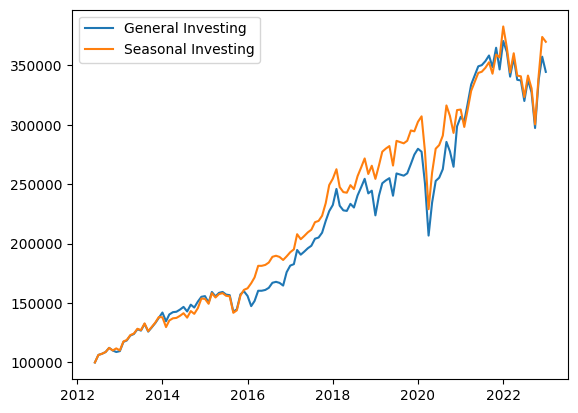

In [32]:
# plot the results
fig, ax = plt.subplots()

ax.plot(timeline["general"]["date"], timeline["general"]["value"], label = "General Investing")
ax.plot(timeline["seasonal"]["date"], timeline["seasonal"]["value"], label = "Seasonal Investing")
plt.legend()

plt.show()

## Findings
Initially, November and March were chosen as the start and end months for the Seasonal Investing Strategy.
This means that on November 1 of each year the positions from the general market were sold and invested only in consumer-realted sectors.
On March 1 of each year these were sold again and the general market, presented by the index, was bought.
The result was that the strategy could not outperform the general market. The results can be found here:

**General portfolio (2012 - 2023)**<br>
Portfolio value: 344496.23 USD<br>
Total return: 244.5 %<br>
Yearly return: 12.4 %

**Seasonal portfolio (2012 - 2023)**<br>
Portfolio value: 320127.77 USD<br>
Total return: 220.13 %<br>
Yearly return: 11.62 %


### Improvements
The goal was to modify the strategy to gain an advantage over the general investment approach. The idea was that other investors could also use the seasonal investment strategy, which could lead to a sell-off of consumer-related stocks before March 1 of each year.

To test this theory, the end value was set to February 1 of each year. This resulted in the Seasonal Investing Strategy outperforming the general approach. Although I realize that the above reason is certainly not the only reason, the experiment shows that seasonal investing can work. The limitations mentioned at the beginning of the paper must also be taken into account. The results can be found below, or you can try it yourself via code above. Just change the variable "seasonal_end_month".

**General portfolio (2012 - 2023)**<br>
Portfolio value: 344496.23 USD<br>
Total return: 244.5 %<br>
Yearly return: 12.4 %

**Seasonal portfolio (2012 - 2023)**<br>
Portfolio value: 369803.3 USD<br>
Total return: 269.8 %<br>
Yearly return: 13.15 %
